In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("alcohol-consumption-vs-gdp-per-capita.csv")
df

,Entity,Code,Year,Total alcohol consumption per capita,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,NaN
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,NaN
4,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
...,...,...,...,...,...,...,...
57079,Zimbabwe,ZWE,1987,NaN,NaN,9527202.0,NaN
57080,Zimbabwe,ZWE,1988,NaN,NaN,9849129.0,NaN
57081,Zimbabwe,ZWE,1989,NaN,NaN,10153852.0,NaN
57082,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57084 entries, 0 to 57083
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               57084 non-null  object 
 1   Code                                                 54099 non-null  object 
 2   Year                                                 57084 non-null  int64  
 3   Total alcohol consumption per capita                 1164 non-null   float64
 4   GDP per capita, PPP (constant 2017 international $)  7109 non-null   float64
 5   Population (historical estimates)                    55656 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.0+ MB


In [38]:
df.isnull().sum()

Entity                                                     0
Code                                                    2985
Year                                                       0
Total alcohol consumption per capita                   55920
GDP per capita, PPP (constant 2017 international $)    49975
Population (historical estimates)                       1428
Continent                                              56799
dtype: int64

In [39]:
df = df.dropna()

In [40]:
df.isnull().sum()

Entity                                                 0
Code                                                   0
Year                                                   0
Total alcohol consumption per capita                   0
GDP per capita, PPP (constant 2017 international $)    0
Population (historical estimates)                      0
Continent                                              0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 2 to 56827
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               180 non-null    object 
 1   Code                                                 180 non-null    object 
 2   Year                                                 180 non-null    int64  
 3   Total alcohol consumption per capita                 180 non-null    float64
 4   GDP per capita, PPP (constant 2017 international $)  180 non-null    float64
 5   Population (historical estimates)                    180 non-null    float64
 6   Continent                                            180 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 11.2+ KB


In [42]:
x = df.loc[:, ['Year','Total alcohol consumption per capita','GDP per capita, PPP (constant 2017 international $)','Population (historical estimates)']].values

print(x.shape)
x_data  = pd.DataFrame(x)
x_data.head()

(180, 4)


,0,1,2,3
0,2015.0,0.21,2068.265904,34413603.0
1,2015.0,6.74,11878.488093,2890524.0
2,2015.0,0.93,11696.965229,39728020.0
3,2015.0,7.96,8036.410898,27884380.0
4,2015.0,5.89,18594.261624,93571.0


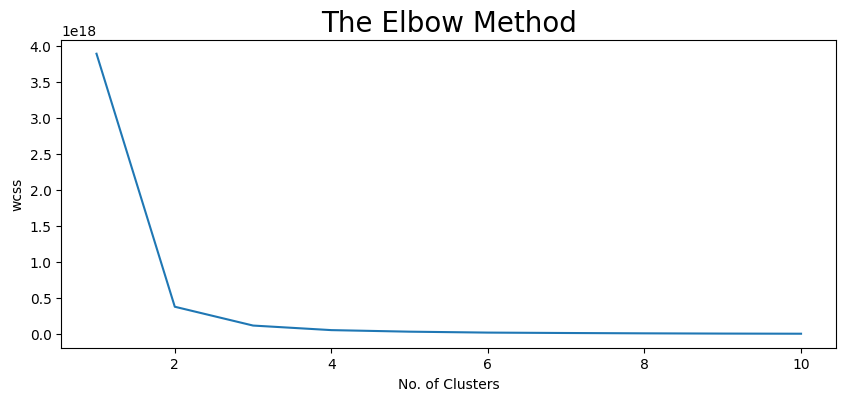

In [43]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [44]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the Results
a = df['Continent']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

In [45]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_her= hc.fit_predict(x)  

# lets find out the Results
b = df['Continent']
y_herr = pd.DataFrame(y_her)
w = pd.concat([y_herr, b], axis = 1)
w= w.rename(columns = {0: 'cluster'})

/Users/admin/Desktop/ML_RegressionProj/env/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


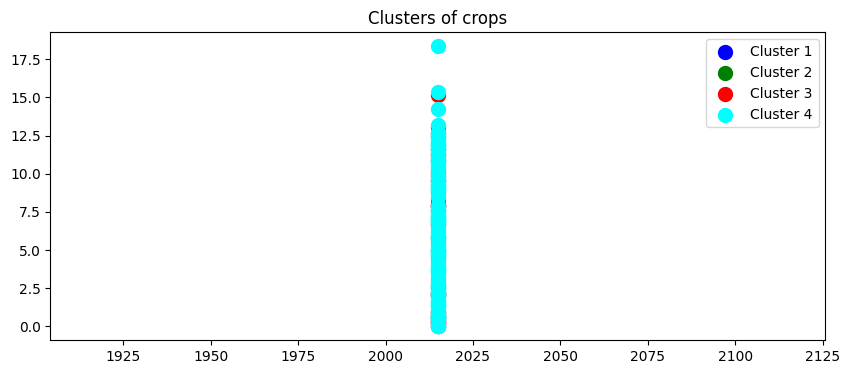

In [46]:
plt.scatter(x[y_her == 0, 0], x[y_her == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_her == 1, 0], x[y_her == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_her == 2, 0], x[y_her == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_her == 3, 0], x[y_her == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.title('Clusters of crops')  
plt.legend()  
plt.show()